In [1]:
# Standard Libraries
import os
import numpy as np
import pandas as pd
import random as rn

# Visualization libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# Seed for reproducability
seed = 1234
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [2]:
# !wget https://raw.githubusercontent.com/sagunkayastha/CAI_Workshop/main/Workshop_3/Inputs/test.csv
# !wget https://raw.githubusercontent.com/sagunkayastha/CAI_Workshop/main/Workshop_3/Inputs/train.csv

In [3]:
# Specify Paths for easy dataloading

TRAIN_PATH = 'Inputs/train.csv'
TEST_PATH = 'Inputs/test.csv'

# Load in training and testing data
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
concat_df = pd.concat([train_df, test_df])

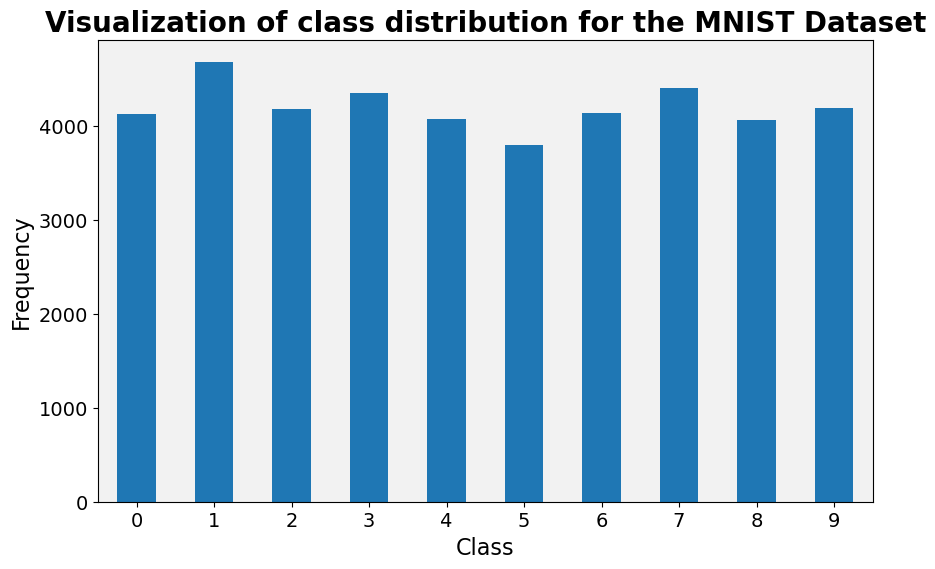

In [4]:
# Visualize target distribution
train_df['label'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

## Creating single neuron

In [5]:

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def single_neuron_forward(inputs, weights, bias):
    """Forward pass through a single neuron using a loop for the weighted sum."""
    total = 0
    for input, weight in zip(inputs, weights):
        total += input * weight
    # total = np.dot(inputs, weights) + bias
        
    
    total += bias
    return sigmoid(total)

<img src="images\single_neuron_example.png" alt="single" width="50%" height="50%">


In [21]:
# Number of inputs to the neuron
num_inputs = 3

# Initialize weights and bias to random values
weights = [0.4,0.9,-0.11]
bias = [0.1]

# Example input
inputs = np.array([0.5, -0.2, 0.1]) 
y_true = 1.12

y_pred = single_neuron_forward(inputs, weights, bias)
print("Output:", y_pred)

Output: [0.52722305]


In [17]:
loss_ = loss_function(y_true, y_pred)
loss_

0.6270515709429917

Binary Cross-Entropy Loss=−(y⋅log(p)+(1−y)⋅log(1−p))

In [7]:
def loss_function(y_true, y_pred):
    """Binary Cross-Entropy loss function."""
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [8]:
def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy_derivative(y_true, y_pred):
    """Derivative of binary cross-entropy loss."""
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def update_weights(inputs, weights, bias, y_true, y_pred, learning_rate):
    """Update weights and bias using gradient descent."""
    error = binary_cross_entropy_derivative(y_true, y_pred)
    sigmoid_deriv = sigmoid_derivative(y_pred)

    # Gradient with respect to each weight
    weights_gradient = inputs * error * sigmoid_deriv

    # Gradient with respect to bias
    bias_gradient = error * sigmoid_deriv

    # Update weights and bias
    weights = weights - learning_rate * weights_gradient
    bias = bias -  learning_rate * bias_gradient
    return weights, bias


# Update weights
print(f'loss before: {loss_function(y_true, y_pred)}')
print(f"Initial weights: {weights}")
weights, bias = update_weights(inputs, weights, bias, y_true, y_pred, learning_rate=0.001)
print(f'Updated weights: {weights}')

y_pred = single_neuron_forward(inputs, weights, bias)
print(f'loss after: {loss_function(y_true, y_pred)}')



loss before: 0.5577080322151765
Initial weights: [0.4, 0.3, -0.11]
Updated weights: [ 0.40026418  0.29989433 -0.10994716]
loss after: 0.5573213839973958


In [22]:
# Get all pixel features
features = [col for col in train_df.columns if col.startswith('pixel')]
# Split up training to for validation
X_train, X_val, y_train, y_val = train_test_split(train_df[features],
                                                  train_df['label'],
                                                  test_size=0.25,
                                                  random_state=seed)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    # First hidden layer with 200 neurons and ReLU activation
    Dense(784, input_shape=(784,), activation='relu'),
    # Second hidden layer with a specified number of neurons (e.g., 100)
    Dense(100, activation='relu'),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [24]:
X_train.shape

(31500, 784)